Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats as st


In [257]:
data = pd.read_csv('/datasets/games.csv')

data.info()

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [258]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [259]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<div class="alert alert-info">
<b></b>
вывод:
    1. подгрузил нужные библиотеки
    2. прочитал файл, озакомилс в какомм виде эти данные представлены
    3. основной вывод будет ниже, сейчас стоит отметить наличие пропусков, типы переменных количественные и качественные
    4. тип данных года - число, а не dt
    5. выяснил количество и название столбцов, тип данных
    6. в колонках где представлены числа - какие минимальные и максимальные значения, особенно это важно для оценок и года
</div>

# 2. Обработка данных

# 2.1 Поиск и узучение  пропущенных значения в столбцах:

In [261]:
#перевожу наименования столбцов в нижний регистр
data.columns = data.columns.str.lower()

In [262]:
#проверяю перевод в нижних регистр
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [263]:
#name

data['name'].unique()


array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [264]:
#проверяю количество пропусков в стобце name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [265]:
#предпологаю что одни и те же названия игр встречаются в разных категориях и соответствнно дублируются в списке
data['name'].value_counts()

Need for Speed: Most Wanted             12
FIFA 14                                  9
LEGO Marvel Super Heroes                 9
Ratatouille                              9
Madden NFL 07                            9
                                        ..
Dragonseeds                              1
Tottadoo! Yoiko no Mujintou Seikatsu     1
Counter-Strike                           1
Famista 64                               1
Dynasty Warriors Vs                      1
Name: name, Length: 11559, dtype: int64

много дуюликатов по именам игр, взможно разные игры встречаются в разных жанрах, странах и прочих категориях, проверим по Need for Speed: Most Wanted 

In [266]:
#проверяю гипотезу на примере одной игры
data[data['name']=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


все верно, основное деление по платформе, году и стране

In [267]:
#genre

#также в стандарте изучаю все уникальные значения, что бы понять количество и качество
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [268]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


пропущенные значения genre и name  совпадают по строкам

In [269]:
#year_of_release

data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [270]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 NAN

In [271]:
#critic_score

data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [272]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


8578 NAN

In [273]:
#user_score

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [274]:
#в данных столбца оценки игроков есть аномалия в виде tbd, смотрю как это выглядит в таблице, есть ли какие то закономерности
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


2424 tbd, явных закономерностей по наличию tbd  не вижу

In [275]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


6701 NAN

In [276]:
#rating

data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [277]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


6766 NAN

# Общий вывод 2.1:

1. year_of_release и critic_score переводим в int
2. user_score переводим в float64

1. пропуски в name и genre по 2шт, это одна игра, с одтельно оценкой по Японии и отдельно по Северной Америке и Европе
2. Пропуски в year_of_release, critic_score, user_score, rating

1. дубликаты в name  по платформе, году и стране. Одна и таже игра имеет независимые релизы на разных платформах, перевыпаскается с обновлениями по годам и отдельные рейтинги по категориям стран
2. 1/8 часть от оценок игроков tbd ("to be defined"), в момент релиза игры видмо не всем играм присваиваются оценки игроков, интересно как потом производители обрабатывают ( если потом обрабатывают) этот параметр, так как есть игры с годом релиза 2001 и без оценки игроков. в оценках критиков такой категории нет, но есть пропуски, возможно по этой же причине


# 2.2 Подготовка данных

обработка пропусков и сразу переводим в нужный типа данных, так как из предыдущего проекта ясно, что с пропусками будут проблемы со сменой типа данных

In [278]:
data.shape[0]

16715

In [279]:
#заранее удаляю две строки с NAN  с name  и genre
data.drop([659, 14244], inplace = True)

In [280]:
data.shape[0]

16713

In [281]:
#year_of_release

data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [282]:
#269 строк - это меньше 2% удаляю
data = data.drop(data[data['year_of_release'].isna() == True].index)

In [283]:
#проверяю
data.shape[0]

16444

In [284]:
#critic_score

data[data['critic_score'].isna()]
    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


удалить нельзя, поставить медиану или среднее  - нельзя, так как оценка вещь индивидуальная. видимо оставляю как есть 

In [286]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


аналогичная ситуация, заменить нельзя, удалить тоже. овые данные по значением tbd  мы тоже не дождемся, поэтому переведем их также в nan

In [287]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [288]:
#проверяю
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [289]:
#rating

data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [290]:
data['rating'].value_counts(dropna=False)

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

чем то заменить нельзя, пока мыслей нет, пусть будут NAN

Суммарные продажи во всех регионах:

In [291]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Здесь отлично. Не все это знают (обычно для "сложения" столбцов коллеги знаком ""+" оперируют).
</div>


In [292]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


# Поиск дубликатов

In [293]:
#поиск явных дубликатов
data.duplicated().value_counts()

False    16444
dtype: int64

In [294]:
#проверяю не явные дубликаты толотко в тех столбцах, где логически они могут быть
data[data.duplicated(subset=['name', 'platform', 'year_of_release', 'genre', 'rating'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


явных дуюликатов нет, отдельно по стобцам наше две строки. Строку 16230 можно просто удалить, она выглядит как не до конца заполненная строка выше

In [295]:
data.shape[0]

16444

In [296]:
#удаляю одну строку
data = data.drop(data[data.index == 16230].index)

In [297]:
#проверяю что "ушла" только одна строка
data.shape[0]

16443

# Преобразования типов данных

In [298]:
data['user_score'] = data['user_score'].astype('float64')

вывод по предобработке данных:
    1. основные пропуски встречаются в оценках критиков и пользователей, их оставил как есть, без заглушек. заполнять средними и медианами нельзя, так как это может повлиять на итоговую аналитику
    2. всего примерно 30% пропусков в каждой категории
    3. удалил всего 2 дубля
    4. добавил data['total_sales'] с суммой всех продаж по регионам

# 3 исследовательский анализ данных

# 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<AxesSubplot:title={'center':'количество выпущеных игр по годам'}, xlabel='year_of_release'>

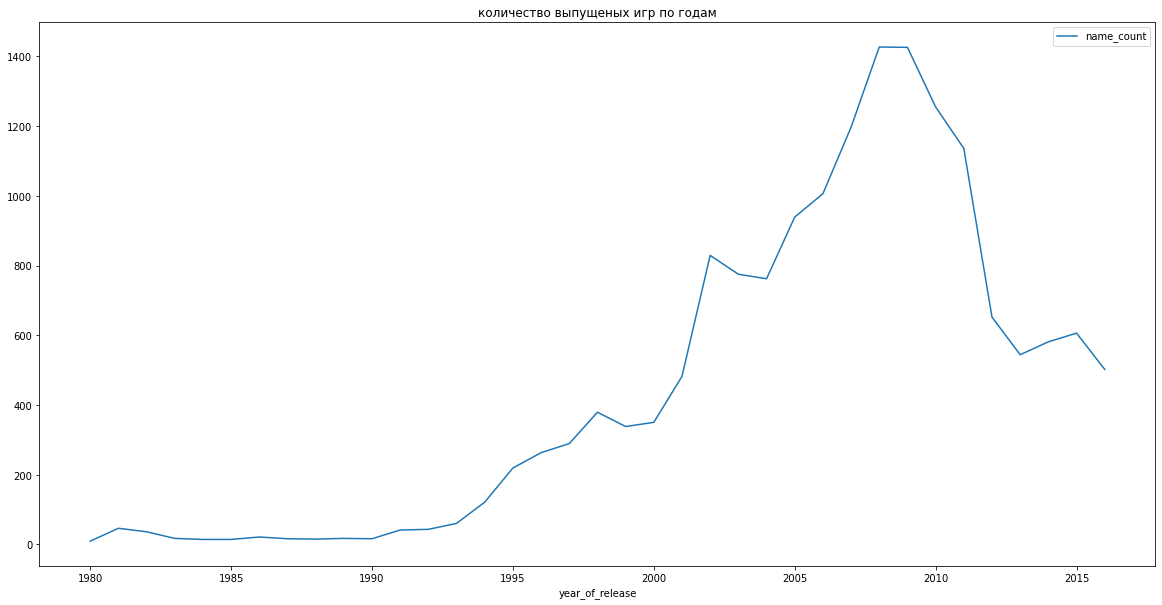

In [299]:
year_of_release_table= pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
year_of_release_table.columns = ['name_count']
year_of_release_table.plot(figsize=[20, 10], title = 'количество выпущеных игр по годам')

c 1980 по 1993 года количество игр не большое, потом с 1993 года начинает появлятся игры на DOS и винде, после 2000го стали появояется XP, видео карты становятся производительнее, появляется 3D графика, помню много было компьютеных салонов, где дети резались в контру. Поосле 2008 года спад из за кризиса, основные игроки на тот момент начали сильно терять в стоимости и сокращать штат. Также с 2008 года в игоровую индустрию приходят мобильные игры, которых в нашей выборке нет

In [300]:
# пробую оставить только одну игру в подсчете, выявляю дубликаты, получается 6582 строк
#для дальнейшей работы с таблицей без дубликаов создаю новую таблицу data_nodupl_name_tear
data_nodupl_name_year = data
data_nodupl_name_year[data_nodupl_name_tear.duplicated(subset=['name', 'year_of_release'], keep=False)]

/tmp/ipykernel_31/1512582411.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_nodupl_name_year[data_nodupl_name_tear.duplicated(subset=['name', 'year_of_release'], keep=False)]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [301]:
#удаляю дубли, оставляю только первую строку
data_nodupl_name_year = data_nodupl_name_year.drop_duplicates(subset=['name', 'year_of_release'])

In [302]:
#проверяю
data_nodupl_name_year[data_nodupl_name_tear.duplicated(subset=['name', 'year_of_release'], keep=False)]

/tmp/ipykernel_31/3822322743.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_nodupl_name_year[data_nodupl_name_tear.duplicated(subset=['name', 'year_of_release'], keep=False)]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16149,Winning Post 7 Maximum 2008,PS2,2008.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16194,Grooverider: Slot Car Thunder,XB,2003.0,Racing,0.01,0.00,0.00,0.00,45.0,7.3,E,0.01
16280,Sherlock Holmes: The Devil's Daughter,PC,2016.0,Adventure,0.00,0.01,0.00,0.00,65.0,7.3,T,0.01
16281,Sakura-Sou no Pet na Kanojo,PSP,2013.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


<AxesSubplot:title={'center':'количество выпущеных игр по годам без дублей по играм'}, xlabel='годы', ylabel='Количество игр'>

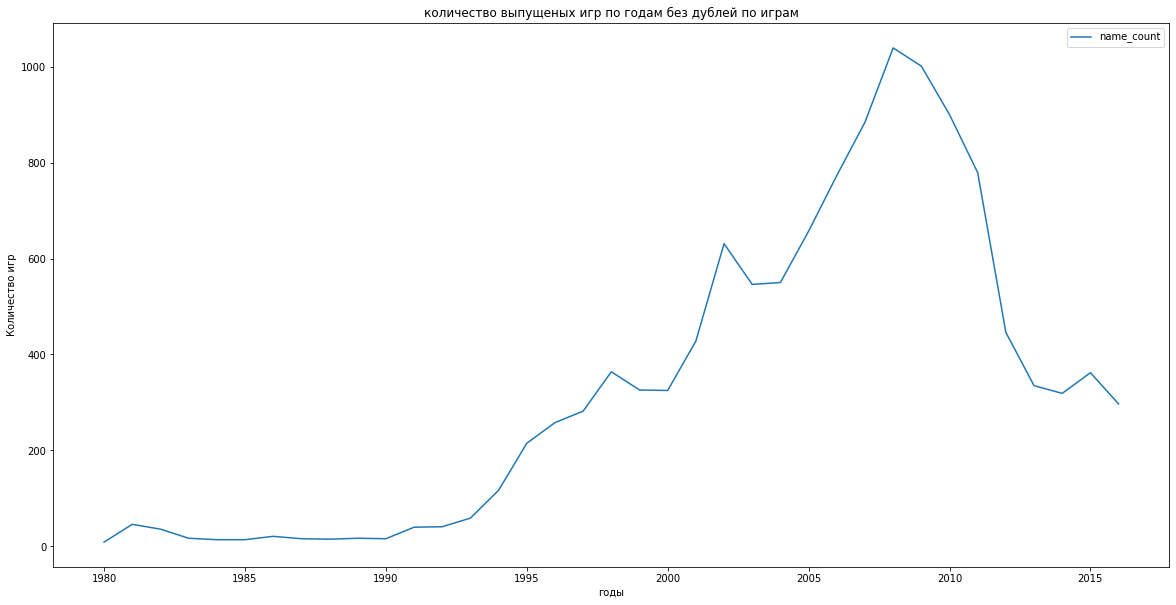

In [303]:
year_of_release_table2= data_nodupl_name_year.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_of_release_table2.columns = ['name_count']
year_of_release_table2.plot(figsize=[20, 10], title = 'количество выпущеных игр по годам без дублей по играм', 
                            xlabel='годы', ylabel='Количество игр')

1. количество упало примерно на треть
2. но динамика практически не  поменялась, выводы по обоим графикам можно сделать одинаковые

в целом по подходу к удалению дублей - в этом случае действительно необходимо обсуждение  с заказчиком, какая у них цель. ведь удаляю дубликаты по годам, я удаляю игры выпущеные на других платформах, вопрос к заказчику - считает он их отдельно или нет.  


# 3.2 как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [304]:
platform_table = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_table = platform_table.sort_values('total_sales', ascending=False)
platform_table

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<Figure size 1152x432 with 0 Axes>

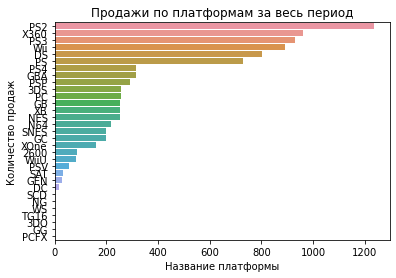

<Figure size 1152x432 with 0 Axes>

In [305]:
sns.barplot(x=platform_table['total_sales'],y=platform_table.index)
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.figure(figsize=(16,6))

In [306]:
#самые продаваемые платформы
platform_table.index[:6]

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

логично что топ это PS в разных итерациях и XBox, также в топ вошла Wii от Nintendo и карманная пристава DS от того же Nintendo

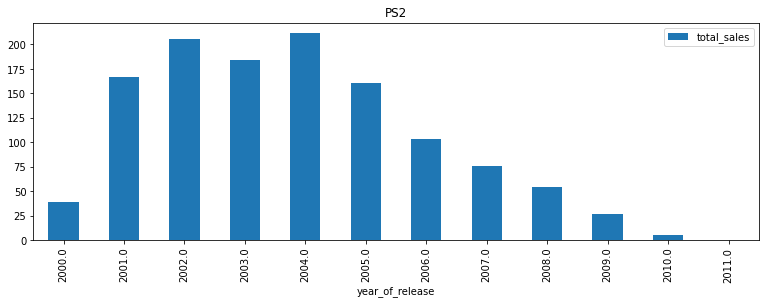

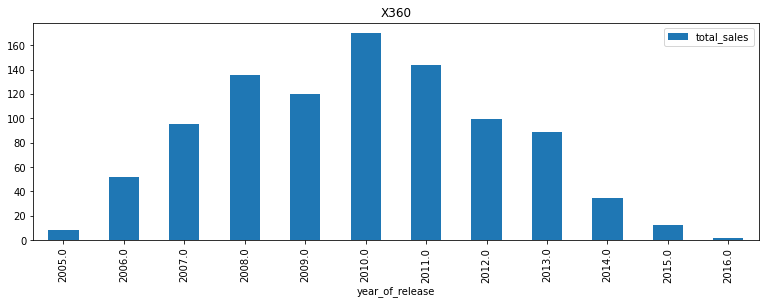

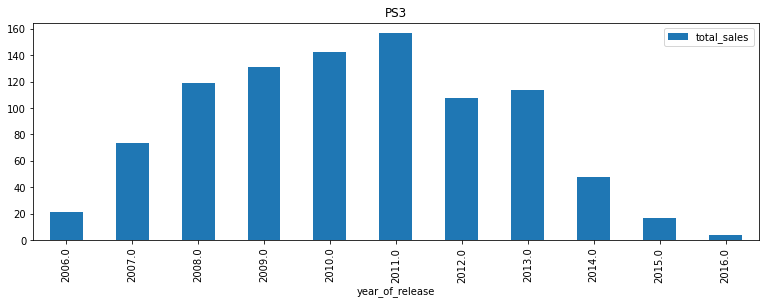

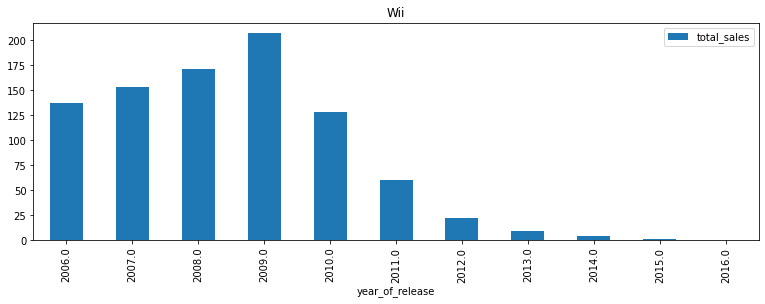

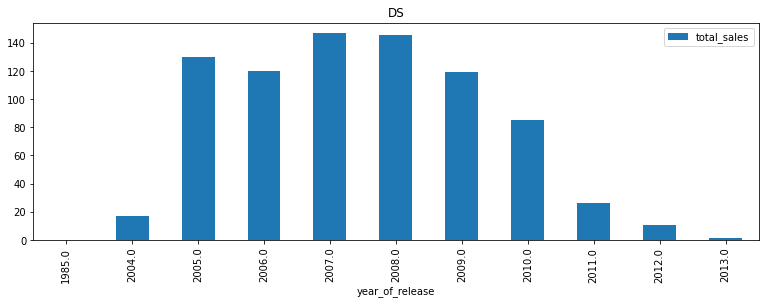

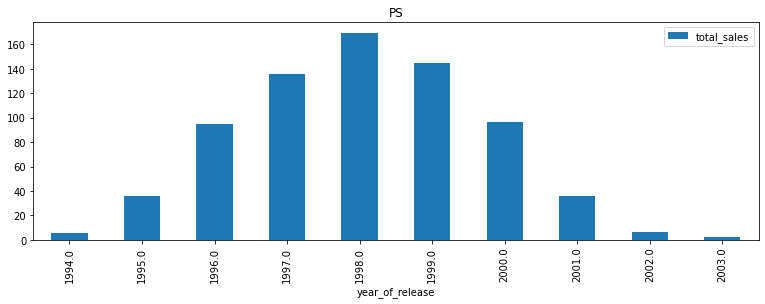

In [307]:
#распределение платформ по годам
for platform in platform_table.index[:6]:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4), title=platform)
    

    

In [308]:
#проверяю строку с платформой DS  и годом 1985
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


DS была выпущена в 2004 году, наличие артефакта пропустил, удаляю

In [ ]:
data.shape[0]

In [ ]:
data = data.drop(data[data.index == 15957]. index)

In [ ]:
data.shape[0]

1. средний срок жизни платформы 8-12 лет. Исключение DS, но это карманная приставка
2. жизнь каждой платформы характеризуется сильным ростом до пика и далее сильным падением, совсем без плато
3. PS  в среднем выпускает новую платформу, через год/два после пика предыдущей

# 3.3 Аналитика за период с 2012года

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [ ]:
#платформы за период с 2012го года 

data[data['year_of_release']>2012].pivot_table(index='platform', values='total_sales', 
                                               aggfunc='sum').sort_values('total_sales', ascending=False)

In [372]:
#самые прибыльные платформы

top5_platform = data[data['year_of_release']>2012].pivot_table(index='platform',values='total_sales', aggfunc='sum') 
top5_platform.sort_values('total_sales', ascending=False).head(5)                                                                                                                                                            
top5_platform

,total_sales
platform,
3DS,143.25
DS,1.54
PC,39.43
PS3,181.43
PS4,314.14
PSP,3.50
PSV,32.99
Wii,13.66
WiiU,64.63


In [373]:
#таблица с данными за период с 2012 года

data_since2012 = data[data['year_of_release']>2012]


In [374]:
#топ5 платформ за период с 2012го года с разбивкой по годам

top5_platform_since2012 = data_since2012[data_since2012['platform'].isin(['PS4', 
        'PS3', 'XOne', '3DS', 'X360'])].pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
top5_platform_since2012

total_sales
platform year_of_release             
3DS      2013.0                 56.57
         2014.0                 43.76
         2015.0                 27.78
         2016.0                 15.14
PS3      2013.0                113.25
         2014.0                 47.76
         2015.0                 16.82
         2016.0                  3.60
PS4      2013.0                 25.99
         2014.0                100.00
         2015.0                118.90
         2016.0                 69.25
X360     2013.0                 88.58
         2014.0                 34.74
         2015.0                 11.96
         2016.0                  1.52
XOne     2013.0                 18.96
         2014.0                 54.07
         2015.0                 60.14
         2016.0                 26.15

In [375]:
top5_platform_since2012.reset_index()['platform'].unique()

array(['3DS', 'PS3', 'PS4', 'X360', 'XOne'], dtype=object)

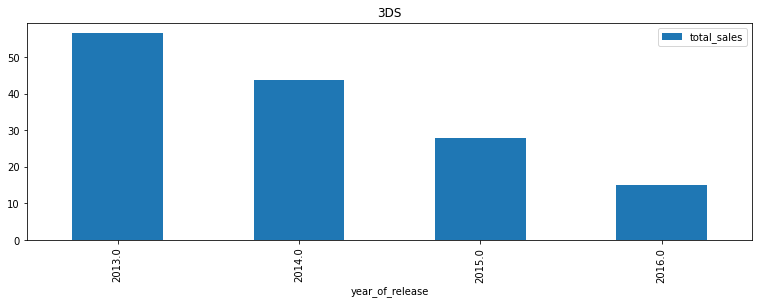

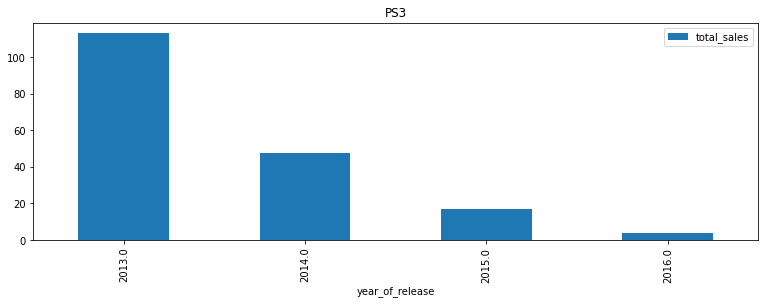

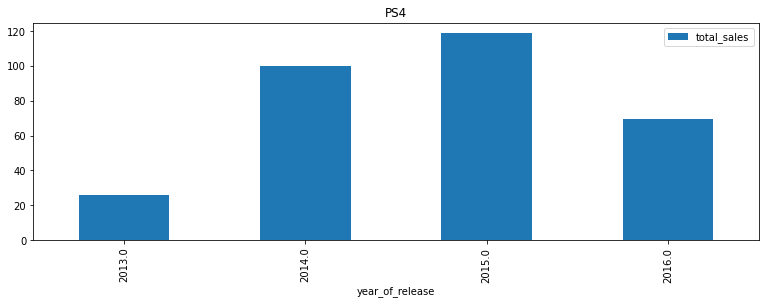

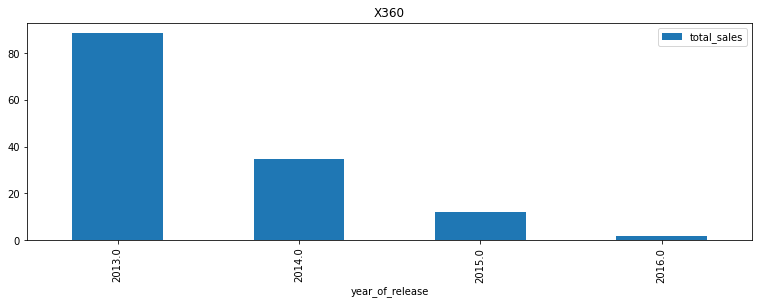

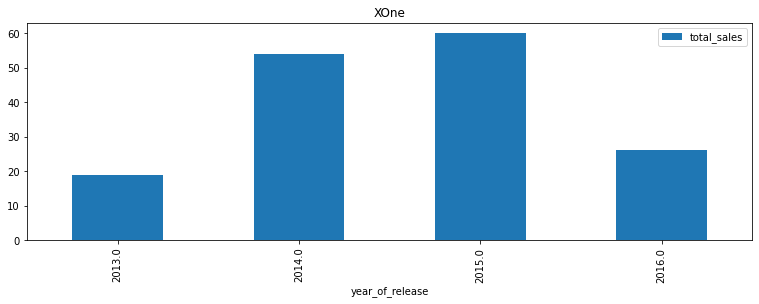

In [376]:
#посмотрим развитие этих топ 5 платформ за выбранный актуальный период
for platform in top5_platform_since2012.reset_index()['platform'].unique():
    data_since2012[data_since2012['platform'] == platform].pivot_table(index='year_of_release',                                                                                       
                                    values='total_sales', aggfunc='sum').plot( kind='bar', figsize=(13,4), title=platform)
       
    


1. все платформы к конце 2016го находятся в стадии падения продаж, но возможно в PS4 спад временный
2. если соответствовать логике, что в среднем платформа выходит в свой пик за 4-5 лет, то к 2017году в свой пик выйдет PS4

# Построим график «ящик с усами» по глобальным продажам игр на актуаьный перид в разбивке по платформам

In [ ]:
#Построим график «ящик с усами» по глобальным продажам игр на актуаьный перид в разбивке по платформам

plt.figure(figsize=(15,12))
sns.boxplot(data=top5_platform_since2012.reset_index(), x='platform', y='total_sales')
plt.title('Глобальные продажи игр на актуаьный перид в разбивке по платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Продажи',fontsize=15)

In [ ]:
#строю осортированный по медиане describe для топ5 платформ на на период с 2012года

top5_platform_since2012.reset_index().groupby('platform')['total_sales'].describe().sort_values('50%', ascending=False)

1. у всех платформ разная медиана
2. в топ по продажам по медиане с сильныи отрывом от остальных выходит PS4, далее Xone. Эти платформы вышли на рынок позже остальых, этим можно объяснить этот успех
3. в каждой платформе средняя меньше 3й квантили, это мы уже наблюдали ранее - тенденция на спад у всех, но также стоит учитывать, что за 2016й год данные не полные и платформы, которые показывали рост по сумме продаж до 16го и в 16м показали спад, по факту могут расти в нашем случае это те же Ps4 и  XOne

# как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [ ]:
#корреляция между оценками критиков и продажами
sps4 = data_since2012[data_since2012['platform']=='PS4']
sps4['critic_score'].corr(sps4['total_sales'])

слабая корреляция между оценками критиков и продажами на платформе PS4

In [ ]:
#построим диаграмму рассеяния

plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sps4)
plt.title('корреляция между оценками критиков и продажами')

In [ ]:
#корреляция между оценками игроков и продажами
sps4 = data_since2012[data_since2012['platform']=='PS4']
sps4['user_score'].corr(sps4['total_sales'])

очень слабая отрицательная корреляция, считай что связи нет 

In [ ]:
#построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sps4)
plt.title('корреляция между оценками игроков и продажами')

In [ ]:
#корреляция между оценками игроков и продажами
sps4 = data_since2012[data_since2012['platform']=='PS4']
sps4['user_score'].corr(sps4['critic_score'])

средняя корреляция между оцеками критиков и оценками игроков

1. средняя корреляция между продажами и оценкой критиков  понятна
2. но отрицательная корреляция между продажами и оценкой игроков уже интереснее, возможно кому игра понравилась так в нее и играют, не выставляя оценок, кому не понравилась - ищут способы выразить свое отношение к ней
3. может поэтому сами поьзователи больше доверяют оценкам критиков

# Соотнесите выводы с продажами игр на других платформах.

In [ ]:

for platform in ["XOne","3DS","X360","PS3"]:
    data_p = data_since2012[data_since2012['platform'] == platform]
   
    data_p.plot.scatter(x="user_score", y="total_sales")
    print(data_p['total_sales'].corr(data_p['user_score']))
    plt.title(platform)
    
    


1. как и в случае с PS4 у остальных топ платформ также  очень слабая кореляция между отзывами игроков и продажами
2. чувь выше остальных 3DS, но она вообще в стороне от остальных, так как является карманной приставкой

In [ ]:
for platform in ["XOne","3DS","X360","PS3"]:
    data_p = data_since2012[data_since2012['platform'] == platform]
   
    data_p.plot.scatter(x="critic_score", y="total_sales")
    print(data_p['total_sales'].corr(data_p['critic_score']))
    plt.title(platform)

1. корреляция между оценками критиков и продажами у остальных платформ также слабая, но если сравнивать с оценками игроков, то уже хоть что  то 
2. самая высокая корреляция у PS3

# общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [379]:
#топ жанорв с самыми высокими продажами по сумме

genre_table = data_since2012.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_table.sort_values('total_sales', ascending=False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


In [380]:
#топ жанорв с самыми высокими продажами по медиане

genre_table = data_since2012.pivot_table(index=['genre'], values='total_sales', aggfunc='median')
genre_table.sort_values('total_sales', ascending=False).head(20)

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


In [381]:
#добавляю в таблицу названия игр, что бы понять знаковые игры для жанра

genre_table = data_since2012.pivot_table(index=['genre', 'name'], values='total_sales', aggfunc='sum')
genre_table.sort_values('total_sales', ascending=False).head(20)


total_sales
genre        name                                                  
Action       Grand Theft Auto V                               56.58
Shooter      Call of Duty: Ghosts                             27.39
             Call of Duty: Black Ops 3                        25.67
Misc         Minecraft                                        24.16
Shooter      Call of Duty: Advanced Warfare                   21.97
Sports       FIFA 15                                          17.37
             FIFA 14                                          16.46
             FIFA 16                                          16.30
Role-Playing Pokemon X/Pokemon Y                              14.60
Shooter      Battlefield 4                                    13.94
Action       Assassin's Creed IV: Black Flag                  13.06
Role-Playing Fallout 4                                        12.67
Shooter      Destiny                                          12.54
Fighting     Super Smash Bros. for Wii U and 3DS              12.42
Shooter      Star Wars Battlefront (2015)                     12.19
Role-Playing Pokemon Omega Ruby/Pokemon Alpha Sapphire        11.68
Sports       FIFA 17                                          11.48
Action       The Last of Us                                   10.58
             LEGO Marvel Super Heroes                          9.41
             Watch Dogs                                        9.18

In [382]:
#посмотрю еще распределения игр по годам

name_year_table = data_since2012.pivot_table(index=['name', 'year_of_release'], values='total_sales', aggfunc='sum')
name_year_table.sort_values('total_sales', ascending=False).head(20)

,,total_sales
name,year_of_release,
Grand Theft Auto V,2013.0,37.32
Call of Duty: Ghosts,2013.0,27.39
Call of Duty: Black Ops 3,2015.0,25.67
Call of Duty: Advanced Warfare,2014.0,21.97
Grand Theft Auto V,2014.0,18.09
FIFA 15,2014.0,17.37
FIFA 14,2013.0,16.46
FIFA 16,2015.0,16.30
Pokemon X/Pokemon Y,2013.0,14.60


не очен наглядно

In [383]:
#возьму одну игру

data_since2012[data_since2012['name'] == 'Grand Theft Auto V']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


слишком мало данных для анализа по играм, в идеале получить количество  и сумме продаж по годам на каждой платформе

1. самые популярные жанры Action, Shooter, Sports 
2. изх популярнось оперделяется знаковыми играми в своей категории. GTA и Assassin в Action, Call of Duty и Battlefield  в Shooter, FIFA в Sports. 
3. теоритически удаляем какую то игру из жанра и сразу меняется позиция в рейтинге жанров
4. самые популярные игры все серии, компаниям выгоднее вкладываться во франшизы чем в разработку новых
5. нельзя также сказать, что пренадлежность к жанру оперделяет будущие продажи, распределение от головы до хвоста в целом одинаковое, хотя есть конечно и такие недорогие жанры как  Puzzle
6. самые дорогие игры из серий GTA и Call of Duty

Общий вывод:
    платформа которая будет однозначно в топе на 2017год - PS4

# Шаг 4. Составьте портрет пользователя каждого региона

# Определите для пользователя каждого региона (NA, EU, JP):

# Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [ ]:
data['na_sales'].describe()

In [ ]:
data['eu_sales'].describe()

In [ ]:
data['jp_sales'].describe()

In [ ]:
fields = [('NA','na_sales'),('EU','eu_sales'),('JP','jp_sales')]
fig = plt.figure(figsize=(15, 6))
for i, pie in enumerate(fields):
    df = data[data['year_of_release']>2012].groupby('genre')[pie[1]].sum().sort_values(ascending=False)
    other = df[6:].sum()
    df = df[:6].copy()
    df['other_genre'] = other
    ax = fig.add_subplot(1,3,i+1)
    df.plot(kind='pie', autopct='%1.1f%%', title=pie[0])
    plt.axis('off')
fig.suptitle("Top 5 жанров в регионах");

1. топ 5 по северной Америке:     Action,       Shooter, Sports, Role-Playing и Misc
   топ 5 по Европейскому региону: Action,       Shooter, Sports, Role-Playing и Racing
   топ 5 по Японии:               Role-Playing, Action,  Misc,   Fighting и Shooter
2. в северной Америке и Европе лидер жанр Action, в Японии как всегда все не как всех в лидерах RPG, когда как в друих регионах, он даже не в первой тройке 
2. 

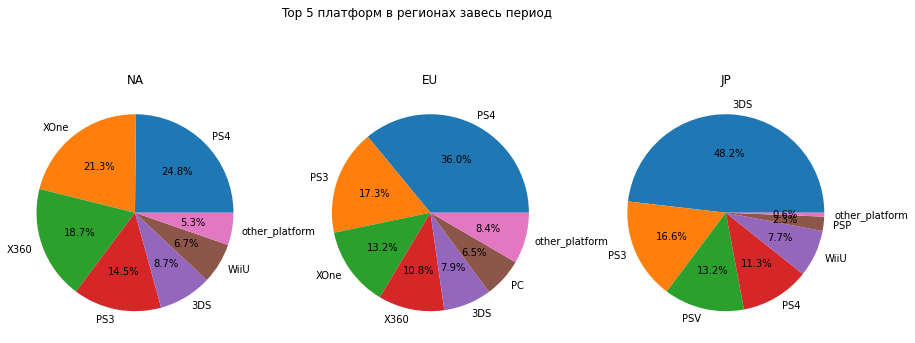

In [339]:
pies = [('NA','na_sales'),('EU','eu_sales'),('JP','jp_sales')]
fig = plt.figure(figsize=(15, 6))
for i, pie in enumerate(pies):
    df = data[data['year_of_release']>2012].groupby('platform')[pie[1]].sum().sort_values(ascending=False)
    other = df[6:].sum()
    df = df[:6].copy()
    df['other_platform'] = other
    ax = fig.add_subplot(1,3,i+1)
    df.plot(kind='pie', autopct='%1.1f%%', title=pie[0])
    plt.axis('off')
fig.suptitle("Top 5 платформ в регионах завесь период");


1. топ 5 платформ по северной Америке:     PS4, XOne, X360, PS3 и  3DS
   топ 5 платформ по Европейскому региону: PS4, PS3,  XOne, X360 и 3DS
   топ 5 платформ по Японии:               3DS, PS3,  PSV,  PS4 и  WiiU
2. в Европе и северной Америке в лидер SP4 когда как на родине SONY лидирует 3DS от Nintendo, напомню - портативная приставка
3. в Северной Америке основные конкуренты SONY и MS, в Японии Nintendo и SONY

# Влияет ли рейтинг ESRB на продажи в отдельном регионе?

M = 17+
T = 13+
E10+ = 10+
E = 0+


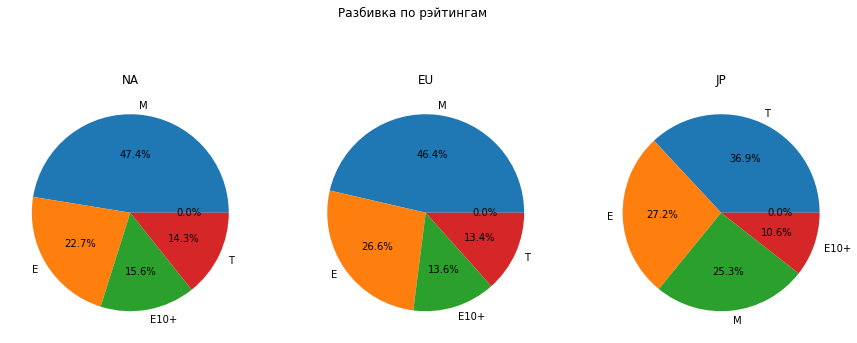

In [377]:
pies = [('NA','na_sales'),('EU','eu_sales'),('JP','jp_sales')]
fig = plt.figure(figsize=(15, 6))
for i, pie in enumerate(pies):
    df = data_since2012.groupby('rating')[pie[1]].sum().sort_values(ascending=False)
    other = df[6:].sum()
    df = df[:6].copy()
    df['other_platform'] = other
    ax = fig.add_subplot(1,3,i+1)
    df.plot(kind='pie', autopct='%1.1f%%', title=pie[0])
    plt.axis('off')
fig.suptitle("Разбивка по рэйтингам");
print('M = 17+')
print('T = 13+')
print('E10+ = 10+')
print('E = 0+')

In [310]:
#смотрим сколько всего игр без рейтинга

data_since2012['rating'].value_counts(dropna=False)

NaN     977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

итак 
1. среднестатисический пользователь из северной Америке 17+, предпочитает шутеры и экшены на PS4 и XOne. 
2. европеец также 17+, выбрает PS 3й и 4й, играет также в шутеры и экшн
3. японец как обычно отличается, в Японии начинают массово играть с 13 лет, предпочитают карманные приставки 3DS  с RPG  на борту

In [318]:
#меняю NAN  на ESRB

data_since2012['rating'] = data_since2012['rating'].fillna("ESRB")

/tmp/ipykernel_31/1229226052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_since2012['rating'] = data_since2012['rating'].fillna("ESRB")


In [320]:
#проверяю


data_since2012['rating'].value_counts(dropna=False)

ESRB    977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

M = 17+
T = 13+
E10+ = 10+
E = 0+


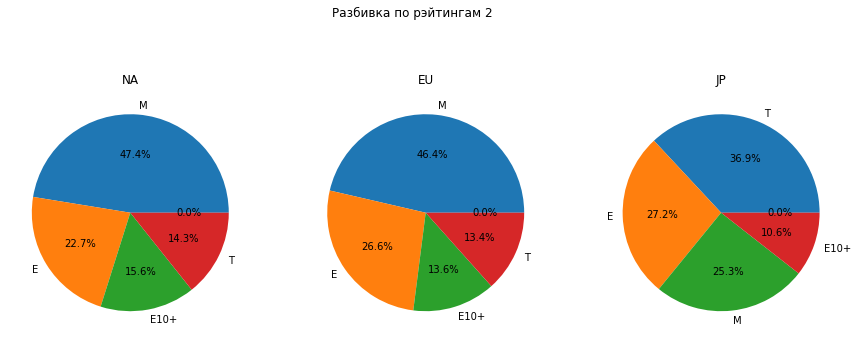

In [378]:
pies = [('NA','na_sales'),('EU','eu_sales'),('JP','jp_sales')]
fig = plt.figure(figsize=(15, 6))
for i, pie in enumerate(pies):
    df = data_since2012.groupby('rating')[pie[1]].sum().sort_values(ascending=False)
    other = df[6:].sum()
    df = df[:6].copy()
    df['other_platform'] = other
    ax = fig.add_subplot(1,3,i+1)
    df.plot(kind='pie', autopct='%1.1f%%', title=pie[0])
    plt.axis('off')
fig.suptitle("Разбивка по рэйтингам 2");
print('M = 17+')
print('T = 13+')
print('E10+ = 10+')
print('E = 0+')

In [338]:
#смотрю какие игры с таким рейтингом

data_since2012[data_since2012['rating']=='ESRB'].pivot_table(index='name', values='total_sales', 
                                            aggfunc='median').sort_values('total_sales', ascending=False).head(20)

,total_sales
name,
Pokemon X/Pokemon Y,14.60
Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.68
Pokemon Sun/Moon,7.14
Super Smash Bros. for Wii U and 3DS,6.21
Tomodachi Life,5.22
The Last of Us,4.72
Star Wars Battlefront (2015),3.66
Minecraft,3.54
Monster Hunter 4,3.44


# 5. Гипотезы

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [349]:
#создаю отдельные serias  с оценками по платформам XOne и PC

xone_h = data_since2012[data_since2012['platform']=='XOne']['user_score'].dropna()
pc_h = data_since2012[data_since2012['platform']=='PC']['user_score'].dropna()

In [356]:
#дисперсия для XOne

np.var(xone_h)

1.8965188383045526

почему у меня дисперсия считается как NAN, при этом в выборке пропусков нет?  такая же ошибка далее, уже проверил разными способами и все одно и тоже 

In [357]:
#дисперсия для PC

np.var(pc_h)

3.016306347554631

In [358]:
alpha = .05

results = st.ttest_ind(xone_h, pc_h, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [368]:
genre_action_h = data_since2012[data_since2012['genre']=='Action']['user_score'].dropna()

genre_sports_h = data_since2012[data_since2012['genre']=='Sports']['user_score'].dropna()

In [369]:
#дисперсия для Action
np.var(genre_action_h)



1.7648124186332366

In [370]:
#дисперсия для sports
np.var(genre_sports_h)

3.160733984375

In [371]:
alpha = .05

results = st.ttest_ind(genre_action_h, genre_sports_h, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


# Общий вывод


 выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
 

 Общий вывод
   
    1. около трети игр имеют пропуски в оценках критиков и игроков, возможно в этапе выхода игры не достаточно данных для того что бы эти пропуски заполнить, но после примерно двух можно уже получить эти данные, предалгаю дать соответствующее задания в соответствующие подразделения
    2. в текущей выборке пропуски по оценкам критиков и игроков заполнять меианами, средними или нулями нельзя, так как это может повлиять на статистику
    3. c 1980 по 1993 года количество игр не большое, потом с 1993 года начинает появлятся игры на DOS и винде, после 2000го стали появояется XP, видео карты становятся производительнее, появляется 3D графика, помню много было компьютеных салонов, где дети резались в контру. Поосле 2008 года спад из за кризиса, основные игроки на тот момент начали сильно терять в стоимости и сокращать штат. Также с 2008 года в игоровую индустрию приходят мобильные игры, которых в нашей выборке нет
    4. но учитывая средную жизнь платформы в 8-12 продуктивнее сосредоточится на изучении данных с 2012го года, так мы будем работать только с актуальными платформами, которые еще могут дать прибыльные игры, на которых нам необходимо будет сосредоточится
    5. в актуальной выборке топ 3 платформы по северной Америке: PS4, XOne, X360.   топ 3 платформы по Европейскому региону: PS4, PS3, XOne и  топ 3 платформы по Японии: 3DS, PS3, PSV. Рассматриать топы необходимо только так - в разбивке по регионам, так как предпочтения игроков по регионам разнятся
    6. в целом самыми продуктивными по продажам платформами на 2017 год будут PS4, XOne, если выбирать только две, но как я описал выше - в идеале сделать разибвку по регионам, в особенности вынести отдельно Японию с очень популярными карманными приставками 3DS
    7. при планировании продаж оценки критиков и игроков можно практически не учитывать, их связь крайне мала
    8. в топ 2 жанров по продажам - шутеры и спорт. в японии RPG, так что при планировании продаж по жанрах также необходимо учитывать специфику региона
    9. популярнось жанров оперделяется знаковыми играми в своей категории. GTA и Assassin в Action, Call of Duty и Battlefield  в Shooter, FIFA в Sports и Покемоны!!! в RPG. что бы строить более коректный прогноз по играм необходимо получить данные по количетву и суммам продаж отдельно по играм в разрезе одной платформы по годам. 
    10. среднестатисический пользователь из северной Америке 17+, предпочитает шутеры и экшены на PS4 и XOne.
европеец также 17+, выбрает PS 3й и 4й, играет также в шутеры и экшн
японец как обычно отличается, в Японии начинают массово играть с 13 лет, предпочитают карманные приставки 3DS с RPG на борту
    